# Exploring NLP Pipeline
As we mentioned in the lecture slides, an NLP pipeline is constructed from  the following steps: 
- Data acquisition, 
- Text extraction and cleaning 
- Pre-processing
- Feature Engineering
- Modelling
- Evaluation
- Deployement
- Monitoring & Model updating

In this notebook we will try to explain some of these steps using Pandas,NLTK, String, Contractions and Scikit-learn libraries.  You can open the cloud version of this notebook using the following link:
<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/Ali-Alameer/NLP/blob/main/week2_code.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table> 

## Twitter Sentiment Analysis
With all of the tweets circulating every second, it is hard to tell whether the sentiment behind a specific tweet will impact a company, or a person's, brand for being viral (positive), or devastate profit because it strikes a negative tone. Capturing sentiment in the language is important in these times where decisions and reactions are created and updated in seconds. In this workshop, we'll create an NLP pipeline to predict the sentiment of each tweet.


## Data acquisition

In order to do any type of NLP analysis one requires data to analyze. The twitter data can be collected using the twitter API (https://developer.twitter.com/en/docs/twitter-api). Twitter API is the official programmatic endpoint provided by Twitter. It allows developers to access the enormous amount of public data on Twitter that millions of users share daily. 

Tweepy (https://www.tweepy.org/) is an easy-to-use Python library for accessing the Twitter API. Its API class provides access to the RESTful methods of the Twitter API. We will skip the data acquisition process for this workshop in order to keep it short. However, you can develop the process of extracting tweets from Twitter API as an individual project for your portfolio.

## Data extraction

The second step in the NLP pipeline is extracting the text from its native form (such as pdf, image or html files). 

Our dataset is a CSV(Comma Separated Values) file that contains tweets data. Each row contains the text of a tweet and a sentiment label. We will use the <b>Pandas</b> library to read the CSV file and load data into a dataframe.

A <b>Pandas DataFrame</b> is a 2 dimensional data structure, like a 2 dimensional array, or a table with rows and columns.

In [1]:
import pandas as pd

# loading CSV files
train_raw = pd.read_csv('train_tweets.csv')

Let to check the loaded data by displaying the first 5 tweets in the dataset.

In [2]:
# print the first 5 rows of training data
train_raw.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


To find out how the data is structured, let's take a look at it. There will be a result showing how many rows and columns the dataset contains by printing the shape attribute.

In [3]:
print(train_raw.shape)

(31962, 3)


The id column is not required in our process so we can remove this column. Also, we can rearrange columns in the dataset by brining the tweet text in the first column and a sentiment label in the second column. 

In [4]:
# rearrange the columns in the training dataset
# and remove the id column
train_df = train_raw[['tweet', 'label']]
train_df.columns = ['tweet', 'sentiment']
train_df.head()

,tweet,sentiment
0,@user when a father is dysfunctional and is s...,0
1,@user @user thanks for #lyft credit i can't us...,0
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,0


We can count the number of positive and negative tweets using the value_counts() method of a dataframe object.

In [5]:
train_df.sentiment.value_counts()

0    29720
1     2242
Name: sentiment, dtype: int64

The dataset description indicates that:
- <b>0</b> ==> <b>positive sentiments</b>
- <b>1</b> ==> <b>negative sentiments</b>

According to the result of the previous cell, there are 29,720 positive tweets and 2,242 negative tweets in the training dataset. As a result, the training dataset is <b>imbalanced</b> since the data points are not equal for the two classes.

For storing sentiments, a Python dictionary is an appropriate data structure.

In [6]:
# define a dictionary to map numbers to corresponding sentiments
map = {0: 'Positive', 1: 'Negative'}

## Text cleaning & pre-processing

Why Do We Need to clean and pre-process Text?

- <b>Extracting plain text</b>: Textual data can come from a wide variety of sources: the web, PDFs, word documents, speech recognition systems, book scans, etc. Your goal is to extract plain text that is free of any source specific markup or constructs that are not relevant to your task.
- <b>Reducing complexity</b>: Some features of our language like capitalization, punctuation, and common words such as a, of, and the, often help provide structure, but don't add much meaning. Sometimes it's best to remove them if that helps reduce the complexity of the procedures you want to apply later.


In order to clean the text of tweets, we will first create a function that lowercase text, expand contractions, removes text enclosed in square brackets, removes links, removes punctuation, and removes words containing numbers.


In [7]:
import re
from string import punctuation
import contractions

def clean_text(text):
    # make text lowercase    
    text = str(text).lower()
    # expand contractions
    text = " ".join([contractions.fix(expanded_word) for expanded_word in text.split()])
    # remove text in square brackets
    text = re.sub('\[.*?\]', '', text)
    # remove links
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    # remove punctuation
    text = re.sub('[%s]' % re.escape(punctuation), '', text)
    # remove new lines
    text = re.sub('\n', '', text)
    # remove words containing numbers
    text = re.sub('\w*\d\w*', '', text)
    return text

In [8]:
# apply clean text fuction on each twitte in the training dataset
train_df['clean_tweet'] = train_df['tweet'].apply(lambda x:clean_text(x))

train_df.head()

,tweet,sentiment,clean_tweet
0,@user when a father is dysfunctional and is s...,0,user when a father is dysfunctional and is so ...
1,@user @user thanks for #lyft credit i can't us...,0,user user thanks for lyft credit i cannot use ...
2,bihday your majesty,0,bihday your majesty
3,#model i love u take with u all the time in ...,0,model i love you take with you all the time in...
4,factsguide: society now #motivation,0,factsguide society now motivation


### <font color='blue'>Exercise</font>

Complete the following code to create a column named "no_sentences" containing the number of sentences for each tweet.


In [9]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SES100\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
from nltk.tokenize import sent_tokenize

# calculate the number of sentences for each tweet
# train_df['no_sentences'] = [len(sentences) for sentences in train_df['tweet'].apply(sent_tokenize)]
train_df['no_sentences'] = # wirth code here

train_df.head()

,tweet,sentiment,clean_tweet,no_sentences
0,@user when a father is dysfunctional and is s...,0,user when a father is dysfunctional and is so ...,2
1,@user @user thanks for #lyft credit i can't us...,0,user user thanks for lyft credit i cannot use ...,2
2,bihday your majesty,0,bihday your majesty,1
3,#model i love u take with u all the time in ...,0,model i love you take with you all the time in...,2
4,factsguide: society now #motivation,0,factsguide society now motivation,1


### Word tokenization

Now we can tokenize tweets into words and extract a list of words for each tweet. We can use the NLTK word tokenizer.

In [12]:
from nltk.tokenize import word_tokenize

train_df['word_list'] = train_df['clean_tweet'].apply(lambda x:word_tokenize(str(x)))
train_df.head()

,tweet,sentiment,clean_tweet,no_sentences,word_list
0,@user when a father is dysfunctional and is s...,0,user when a father is dysfunctional and is so ...,2,"[user, when, a, father, is, dysfunctional, and..."
1,@user @user thanks for #lyft credit i can't us...,0,user user thanks for lyft credit i cannot use ...,2,"[user, user, thanks, for, lyft, credit, i, can..."
2,bihday your majesty,0,bihday your majesty,1,"[bihday, your, majesty]"
3,#model i love u take with u all the time in ...,0,model i love you take with you all the time in...,2,"[model, i, love, you, take, with, you, all, th..."
4,factsguide: society now #motivation,0,factsguide society now motivation,1,"[factsguide, society, now, motivation]"


### Finding the most common words in tweets text

Before removing stop words it is worth looking at the tweet's word list and extracting the most common words in tweet texts. This step will help us to understand why we need to remove stop words from the word list. 

In the "collections" module of python, you'll find a class specially designed to count several different objects in one go. This class is conveniently called <b>Counter</b>. We use the Counter class to count the number of repetitions of a word in the word list column and then we store the result in a new dataframe. 

In [13]:
from collections import Counter 

top = Counter([item for sublist in train_df['word_list'] for item in sublist])
temp_df = pd.DataFrame(top.most_common(20))
temp_df.columns = ['Common_words','count']
temp_df.style.background_gradient(cmap = 'Blues')

,Common_words,count
0,user,17474
1,the,10156
2,to,10089
3,you,7510
4,i,7288
5,a,6416
6,is,6108
7,and,4871
8,in,4638
9,for,4479


### Stop words removal

As you can see, many of the most commonly used words are not useful for identifying tweet sentiment. They belong to the stop words list and should be removed from the tweets words list. 

In [14]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SES100\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
def remove_stopword(word_list):
  return [word for word in word_list if word not in stopwords.words('english')]

train_df['word_list_without_sw'] = train_df['word_list'].apply(lambda x:remove_stopword(x))

In [16]:
train_df.head()

,tweet,sentiment,clean_tweet,no_sentences,word_list,word_list_without_sw
0,@user when a father is dysfunctional and is s...,0,user when a father is dysfunctional and is so ...,2,"[user, when, a, father, is, dysfunctional, and...","[user, father, dysfunctional, selfish, drags, ..."
1,@user @user thanks for #lyft credit i can't us...,0,user user thanks for lyft credit i cannot use ...,2,"[user, user, thanks, for, lyft, credit, i, can...","[user, user, thanks, lyft, credit, use, offer,..."
2,bihday your majesty,0,bihday your majesty,1,"[bihday, your, majesty]","[bihday, majesty]"
3,#model i love u take with u all the time in ...,0,model i love you take with you all the time in...,2,"[model, i, love, you, take, with, you, all, th...","[model, love, take, time, areð±, ððð..."
4,factsguide: society now #motivation,0,factsguide society now motivation,1,"[factsguide, society, now, motivation]","[factsguide, society, motivation]"


Let's to check the most common words in the tweets after removing all stop words.

In [17]:
top = Counter([item for sublist in train_df['word_list_without_sw'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp = temp.iloc[1:,:]
temp.columns=['Common_words','count']
temp.style.background_gradient(cmap='Purples')

,Common_words,count
1,love,2668
2,day,2198
3,happy,1663
4,amp,1582
5,time,1110
6,life,1086
7,like,1042
8,â¦,1004
9,today,991
10,new,983


### Most common words sentiments wise

As a result of this process, we can see some meaningful words among the most common words. As we have more positive tweets in our dataset, positive words have a larger proportion. We can check the most common word in both negative and positive tweets separately. In the following cell, we will create two separate dataframes for each sentiment and repeat the above process. 

In [18]:
# create seperate dataframes for each sentiment
Positive_sent = train_df[train_df['sentiment'] == 0]
Negative_sent = train_df[train_df['sentiment'] == 1]

In [19]:
# MosT common positive words
top = Counter([item for sublist in Positive_sent['word_list_without_sw'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_positive_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_positive_words,count
0,user,15614
1,love,2643
2,day,2190
3,happy,1651
4,amp,1314
5,time,1088
6,life,1080
7,today,979
8,positive,925
9,thankful,919


In [20]:
# MosT common negative words
top = Counter([item for sublist in Negative_sent['word_list_without_sw'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Common_negative_words','count']
temp_negative.style.background_gradient(cmap='Reds')

,Common_negative_words,count
1,amp,268
2,trump,197
3,â¦,181
4,libtard,149
5,like,137
6,white,137
7,black,131
8,racist,102
9,people,99
10,politics,96


### Lemmatization

Both stemming and lemmatization converts word to its base form. Stemming is a fast rule based technique and sometimes chops off inaccurately (under-stemming and over-stemming). You may have noticed NLTK provides PorterStemmer and a slightly improved Snowball Stemmer.

Lemmatization is dictionary based technique, more accurate but slightly slower than stemming. We will use WordnetLemmatizer from NLTK. We will download the wordnet resource for this purpose.

In [21]:
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
train_df['word_list_without_sw'] = train_df['word_list_without_sw'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
train_df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SES100\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,tweet,sentiment,clean_tweet,no_sentences,word_list,word_list_without_sw
0,@user when a father is dysfunctional and is s...,0,user when a father is dysfunctional and is so ...,2,"[user, when, a, father, is, dysfunctional, and...","[user, father, dysfunctional, selfish, drag, k..."
1,@user @user thanks for #lyft credit i can't us...,0,user user thanks for lyft credit i cannot use ...,2,"[user, user, thanks, for, lyft, credit, i, can...","[user, user, thanks, lyft, credit, use, offer,..."
2,bihday your majesty,0,bihday your majesty,1,"[bihday, your, majesty]","[bihday, majesty]"
3,#model i love u take with u all the time in ...,0,model i love you take with you all the time in...,2,"[model, i, love, you, take, with, you, all, th...","[model, love, take, time, areð±, ððð..."
4,factsguide: society now #motivation,0,factsguide society now motivation,1,"[factsguide, society, now, motivation]","[factsguide, society, motivation]"


### Final pre-processing

Let's to concatinate all the words in the last column on the dataframe and create a cleaned version of tweet text.

In [22]:
train_df['final_tweet'] = train_df['word_list_without_sw'].apply(lambda x:' '.join(x))
train_df.head()

,tweet,sentiment,clean_tweet,no_sentences,word_list,word_list_without_sw,final_tweet
0,@user when a father is dysfunctional and is s...,0,user when a father is dysfunctional and is so ...,2,"[user, when, a, father, is, dysfunctional, and...","[user, father, dysfunctional, selfish, drag, k...",user father dysfunctional selfish drag kid dys...
1,@user @user thanks for #lyft credit i can't us...,0,user user thanks for lyft credit i cannot use ...,2,"[user, user, thanks, for, lyft, credit, i, can...","[user, user, thanks, lyft, credit, use, offer,...",user user thanks lyft credit use offer wheelch...
2,bihday your majesty,0,bihday your majesty,1,"[bihday, your, majesty]","[bihday, majesty]",bihday majesty
3,#model i love u take with u all the time in ...,0,model i love you take with you all the time in...,2,"[model, i, love, you, take, with, you, all, th...","[model, love, take, time, areð±, ððð...",model love take time areð± ðððð ð...
4,factsguide: society now #motivation,0,factsguide society now motivation,1,"[factsguide, society, now, motivation]","[factsguide, society, motivation]",factsguide society motivation


## Feature engineering

Remember the input data is just a bunch of words for now. Machine learning models only understand and work on numbers. So we have to convert all the text into numbers. In NLP, this conversion of raw text to a suitable numerical form is called <b>text representation</b>. You will learn about this process in the following  lectures. 

Now that input is clean and ready, we convert it into numbers using something called the <b>"Bag of Words"</b> approach. We create a matrix table, where each row represents a sentence and each word will have a separate column for itself that represents its frequency. Let’s take an example, to make it easier. Let’s say there are 3 tweets like: 
- The food is really bad 
- The food is really good  
- The food is really good and tasty. 

This could be represented as a matrix using the bag of words approach as shown:

| Tweet Number | The | food | is | bad | really | good | tasty | and |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | 
| 1 |  1 |  1 |  1 |  1 |  1 |  0 |  0 |  0 | 
| 2 |  1 |  1 |  1 |  0 |  1 |  1 |  0 |  0 | 
| 3 |  1 |  1 |  1 |  0 |  1 |  1 |  1 |  1 | 

One problem about this method that you might not notice is that the order of the sentence is lost. There are other approaches to counter this, but we are just going to stick with this method at the moment. You will learn more about other approaches in the following workshops. 

The CountVectorizer class in the "sklearn.feature_extraction.text" module will be utilised to generate Bag of words for our tweets dataset.The Count Vectorizer function converts a list of words into a bag of words, however, notice that we specify something called the max features to it. As you might have seen in the bag of words illustration table, each word will have a separate column. This number of columns can explode into large numbers in big datasets. 

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 8000, ngram_range = (1,2))
X = cv.fit_transform(train_df['final_tweet']).toarray()
y = train_df['sentiment']

To avoid this we set the max columns as 8000, and keep the maximum occurring 8000 words. Finally, the `cv.fit_transform` function takes the cleaned data and converts it into the bag of words that we wanted.

In [26]:
print("X: ", X[0:5])
print("y: ",y[0:5])

X:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
y:  0    0
1    0
2    0
3    0
4    0
Name: sentiment, dtype: int64


## Modelling

One of the first decisions to make when starting a modeling phase is how to utilize the existing data. One common technique is to split the data into two groups typically referred to as the `training` and `testing` sets. The training set is used to train a model and the test set is used to evaluate the model. 

The `train_test_split` class of `sklearn.model_selection` class has been used to generate the training and test set in the following cell.

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("number of tweets in training dataset: ", len(X_train))
print("number of tweets in testing dataset: ", len(X_test))

number of tweets in training dataset:  25569
number of tweets in testing dataset:  6393


In this section, we’ll build classifiers using five well-known machine learning algorithms: 
- Multinomial Naive Bayes,
- Bernoulli Naive Bayes, 
- logistic regression, 
- Random Forest, and 
- Decision Tree 

You don't need to worry about these models as you will learn detailed implementation of them in the `Machine Learning` module next semester. 

In the following section, we will import the required libraries to create our classifiers. To evaluate the models after they have been trained, a list of evaluation metrics is also imported.

In [39]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

Now we need to create an object from each of the classifiers model. 


In [40]:
mnb_model = MultinomialNB()
bnb_model = BernoulliNB()
lr_model = LogisticRegression(max_iter = 300, multi_class = "multinomial")
rfc_model = RandomForestClassifier(n_estimators = 50, random_state = 2, max_depth = 25)
tree_model = DecisionTreeClassifier(max_depth = 30)

To optimize the code the following code defined a function that trains and returns the accuracy, and precision scores of the trained model. We also created a dictionary to store our model names. Then using a for loop we will call the function to train and store the socres for all of them.

Model:  Multinomial Naive Bayes
Accuracy:  0.9513530423901142
Precision:  0.9513530423901142
Confusion Matrix:  [[5759  178]
 [ 133  323]]


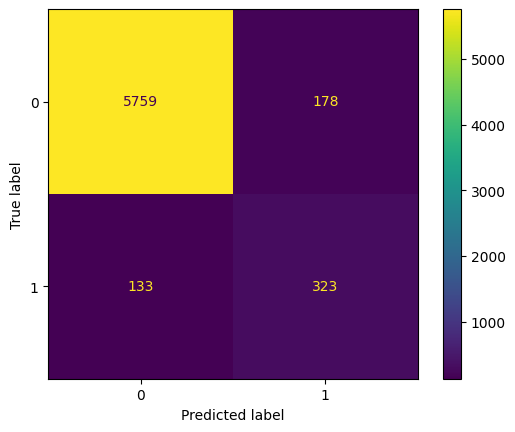

Recall:  0.9513530423901142
F1:  0.9513530423901142
Model:  Bernoulli Naive Bayes
Accuracy:  0.9488503050211169
Precision:  0.9488503050211169
Confusion Matrix:  [[5795  142]
 [ 185  271]]


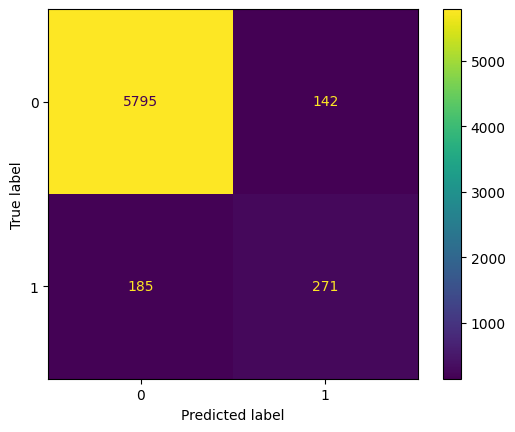

Recall:  0.9488503050211169
F1:  0.9488503050211169
Model:  Logistic Regression
Accuracy:  0.9568277803847959
Precision:  0.9568277803847959
Confusion Matrix:  [[5875   62]
 [ 214  242]]


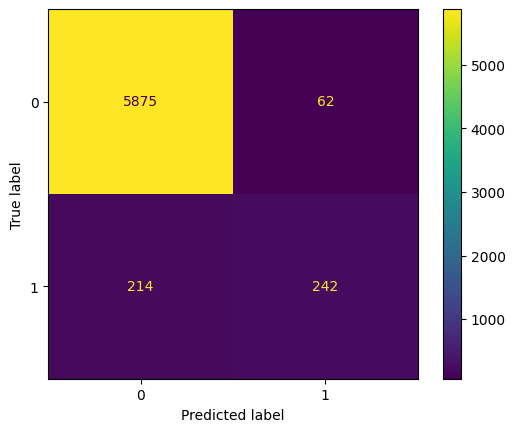

Recall:  0.9568277803847959
F1:  0.9568277803847959
Model:  Random Forest Classifier
Accuracy:  0.9393086188018145
Precision:  0.9393086188018145
Confusion Matrix:  [[5937    0]
 [ 388   68]]


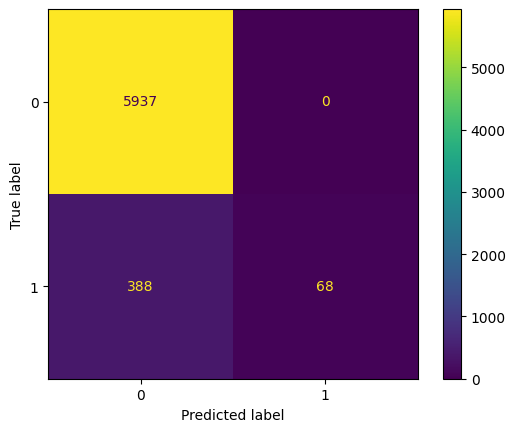

Recall:  0.9393086188018145
F1:  0.9393086188018145
Model:  Decision Tree Classifier
Accuracy:  0.9488503050211169
Precision:  0.9488503050211169
Confusion Matrix:  [[5896   41]
 [ 286  170]]


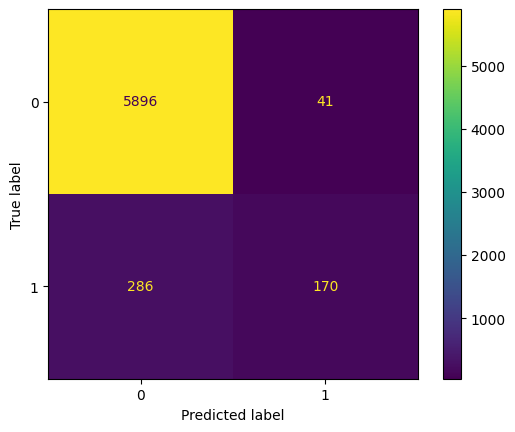

Recall:  0.9488503050211169
F1:  0.9488503050211169


In [41]:
def train_classifier(model, X_train, y_train, X_test, y_test):
    # train the model on training data
    model.fit(X_train, y_train)
    
    # evaluate the model
    y_pred = model.predict(X_test)

    # calculate the performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average = "micro")
    confusion = confusion_matrix(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average = "micro")
    f1 = f1_score(y_test, y_pred, average = "micro")

    return accuracy, precision, confusion, recall, f1

# create a dictionary of models
models = {
    'Multinomial Naive Bayes': mnb_model,
    'Bernoulli Naive Bayes': bnb_model,
    'Logistic Regression': lr_model,
    'Random Forest Classifier': rfc_model,
    'Decision Tree Classifier': tree_model
}

# create a list to store performance of models
accuracy_scores = []
precision_scores = []
confusions = []
recall_scores = []
f1_scores = []

for model_name, model in models.items():
    
    # train the model on training data
    cur_accuracy, cur_precision, cur_confusion, cur_recall, cur_f1 = train_classifier(model, X_train, y_train, X_test, y_test)

    # print model performance
    print("Model: " , model_name)
    print("Accuracy: ", cur_accuracy)
    print("Precision: ", cur_precision)
    print("Confusion Matrix: ", cur_confusion)
    disp = ConfusionMatrixDisplay(cur_confusion, display_labels = map.keys())
    disp.plot()
    plt.show()
    print("Recall: ", cur_recall)
    print("F1: ", cur_f1)

    # append the performance metrics to a list
    accuracy_scores.append(cur_accuracy)
    precision_scores.append(cur_precision)
    confusions.append(cur_confusion)
    recall_scores.append(cur_recall)
    f1_scores.append(cur_f1)


## Evaluation 

In order to show the performance of all models together a dataframe is created and displayed in the following cell.

In [42]:
performance_df = pd.DataFrame({'Algorithm': models.keys(), 
                                'Accuracy': accuracy_scores, 
                                'Precision': precision_scores, 
                                'Recall': recall_scores, 
                                'F1': f1_scores,
                                'Confusion': confusions}).sort_values("Precision", ascending = False, ignore_index = True)

performance_df


,Algorithm,Accuracy,Precision,Recall,F1,Confusion
0,Logistic Regression,0.956828,0.956828,0.956828,0.956828,"[[5875, 62], [214, 242]]"
1,Multinomial Naive Bayes,0.951353,0.951353,0.951353,0.951353,"[[5759, 178], [133, 323]]"
2,Bernoulli Naive Bayes,0.948850,0.948850,0.948850,0.948850,"[[5795, 142], [185, 271]]"
3,Decision Tree Classifier,0.948850,0.948850,0.948850,0.948850,"[[5896, 41], [286, 170]]"
4,Random Forest Classifier,0.939309,0.939309,0.939309,0.939309,"[[5937, 0], [388, 68]]"


Among all other models, we can see that Logistic regression performs the best with an accuracy score of 95% followed by Multinomail Naive Bayes. As it is a classification task so we will not take recall and precision into consideration because here false-positive and false-negative don’t concern us.

Finally, we can save the model using a pickle file so that we can deploy it into the deployment phase.

In [36]:
import pickle

file_name = "./best_model/LogisticRegression.pickle"
pickle.dump(lr_model, open(file_name, "wb"))
